#                                              Problem Statement
## Introduction

Solving this case study will give you an idea of how real-life business problems are solved using EDA. In this case study, you will apply the techniques that you have learnt in EDA. You will also develop a basic understanding of risk analytics in banking and financial services and understand how data minimises the risk of losing money while lending it to customers.

 
## Business Understanding

You work for a consumer finance company that specialises in providing various types of loans to urban customers. When the company receives a loan application, it has to decide whether to approve or reject it based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company.

If the applicant is not likely to repay the loan, i.e., they are likely to default, then approving the loan may lead to financial loss for the company.

 The data given below contains information about past loan applicants and whether they ‘defaulted’. The aim is to identify patterns indicating that a person is likely to default, which may be used to deny the loan, reduce the loan amount, lend (to risky applicants) at a higher interest rate, etc.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of defaulting.

When a person applies for a loan, there are two types of decisions that could be taken by the company:

1. Loan accepted: If the company approves the loan, there are three possible scenarios, as described below:
- Fully paid: The applicant has fully paid the loan (the principal and the interest amount).
- Current: The applicant is in the process of paying the instalments, i.e., the tenure of the loan is not yet completed. These candidates are not labelled as ‘defaulted’.
- Charged-off: The applicant has not paid the instalments in due time for a long period, i.e., they have defaulted on the loan.
2. Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements, etc.). Since the loan was rejected, there is no transactional history of those applicants with the company; so, this data is not available with the company (and thus, in this data set).

## Objective
Identify and mitigate credit loss, the primary financial loss due to borrower defaults ('charged-off' customers). Aim is to use Exploratory Data Analysis (EDA) to pinpoint key factors that strongly indicate loan default. This knowledge will enhance portfolio management and risk assessment strategies.

#### Key Point: The company seeks to uncover significant driver variables behind loan defaults through EDA, enabling better risk assessment and reduction of high-risk loans.

In [1]:
# Importing warninga library to ignore error messages
import warnings
warnings.filterwarnings('ignore')

## Import  Libraries

In [2]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)

In [3]:
# Reading data set
df=pd.read_csv('loan.csv')

In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [5]:
# Checking shape of dataset
df.shape

(39717, 111)

In [6]:
# checking info of datatypes and null values in a datset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


- Due to maximum size it is not displaying all details of dataset

# Exploratory Data Analysis

## Data Types

In [7]:
# checking info of dataset
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

## Fixing Rows and Columns

In [8]:
# Checking the missing percentage of all columns
(df.isnull().sum()/len(df.index))*100

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [9]:
## list the column of 30% missing values
missing_30_per = df.columns[(round(100 * (df.isnull().sum() / len(df.index)), 2)) > 30]

In [10]:
missing_30_per

Index(['desc', 'mths_since_last_delinq', 'mths_since_last_record',
       'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint',
       'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
     

In [11]:
# Delete all above 30% missing values columns
df1=df.drop(missing_30_per,axis=1)

In [12]:
# Display Remaining column 
df1.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

###### Including only necessary columns

In [13]:
# craete new data set variable for required columns for this case study
inp0=df1[['loan_amnt','term','installment','int_rate','grade','sub_grade','emp_length','home_ownership','annual_inc','verification_status',
    'loan_status','purpose','dti','delinq_2yrs','open_acc','pub_rec','revol_bal','revol_util','total_acc',
    'total_pymnt','total_rec_prncp','addr_state','application_type']]

### Correcting format

In [14]:
# Check datatypes of all columns to see if all column have correct format
inp0.dtypes

loan_amnt                int64
term                    object
installment            float64
int_rate                object
grade                   object
sub_grade               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
loan_status             object
purpose                 object
dti                    float64
delinq_2yrs              int64
open_acc                 int64
pub_rec                  int64
revol_bal                int64
revol_util              object
total_acc                int64
total_pymnt            float64
total_rec_prncp        float64
addr_state              object
application_type        object
dtype: object

In [15]:
# Lets detect what causes int_rate to nact like object type
inp0.int_rate

0        10.65%
1        15.27%
2        15.96%
3        13.49%
4        12.69%
          ...  
39712     8.07%
39713    10.28%
39714     8.07%
39715     7.43%
39716    13.75%
Name: int_rate, Length: 39717, dtype: object

In [16]:
# Correcting the interest_rate column data type
inp0.int_rate=inp0.int_rate.apply(lambda x: float(x[:-1]))

In [17]:
inp0.revol_util.value_counts()

0%        977
0.20%      63
63%        62
40.70%     58
66.70%     58
         ... 
25.74%      1
47.36%      1
24.65%      1
10.61%      1
7.28%       1
Name: revol_util, Length: 1089, dtype: int64

In [18]:
# Correcting the revol_util column data type
inp0['revol_util'] = inp0['revol_util'].apply(lambda x: float(x[:-1]) if isinstance(x, str) else x)

In [19]:
# Check unique states 
inp0.addr_state.unique()

array(['AZ', 'GA', 'IL', 'CA', 'OR', 'NC', 'TX', 'VA', 'MO', 'CT', 'UT',
       'FL', 'NY', 'PA', 'MN', 'NJ', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA',
       'WA', 'WI', 'AL', 'CO', 'KS', 'NV', 'AK', 'MD', 'WV', 'VT', 'MI',
       'DC', 'SD', 'NH', 'AR', 'NM', 'MT', 'HI', 'WY', 'OK', 'DE', 'MS',
       'TN', 'IA', 'NE', 'ID', 'IN', 'ME'], dtype=object)

In [20]:
# Replace states with appropriate names
state_abbreviations = { 'AZ': 'Arizona', 'GA': 'Georgia', 'IL': 'Illinois', 'CA': 'California','OR': 'Oregon','NC': 'North Carolina',
'TX': 'Texas','VA': 'Virginia','MO': 'Missouri','CT': 'Connecticut','UT': 'Utah','FL': 'Florida','NY': 'New York','PA': 'Pennsylvania',
'MN': 'Minnesota','NJ': 'New Jersey','KY': 'Kentucky','OH': 'Ohio','SC': 'South Carolina','RI': 'Rhode Island','LA': 'Louisiana',
'MA': 'Massachusetts','WA': 'Washington','WI': 'Wisconsin','AL': 'Alabama','CO': 'Colorado','KS': 'Kansas','NV': 'Nevada',
'AK': 'Alaska','MD': 'Maryland','WV': 'West Virginia','VT': 'Vermont','MI': 'Michigan','DC': 'District of Columbia',
'SD': 'South Dakota', 'NH': 'New Hampshire', 'AR': 'Arkansas', 'NM': 'New Mexico','MT': 'Montana','HI': 'Hawaii','WY': 'Wyoming',
'OK': 'Oklahoma','DE': 'Delaware','MS': 'Mississippi','TN': 'Tennessee','IA': 'Iowa','NE': 'Nebraska','ID': 'Idaho',
'IN': 'Indiana','ME': 'Maine'}

inp0['addr_state'] = inp0['addr_state'].replace(state_abbreviations)


## Handling Missing Values

In [21]:
# lets see the percentage of missing values for all columns in the dataset
inp0.isnull().sum()

loan_amnt                 0
term                      0
installment               0
int_rate                  0
grade                     0
sub_grade                 0
emp_length             1075
home_ownership            0
annual_inc                0
verification_status       0
loan_status               0
purpose                   0
dti                       0
delinq_2yrs               0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util               50
total_acc                 0
total_pymnt               0
total_rec_prncp           0
addr_state                0
application_type          0
dtype: int64

In [22]:
# checking percentage of missing values for emp_length
inp0.emp_length.isnull().sum()/len(inp0.index)*100

2.7066495455346575

In [23]:
# write a code to see which values is most frequently appearing
inp0.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [106]:
# As it contains very small percentage of missing value we can delete those missing value
inp0=inp0[~inp0.emp_length.isnull()]

In [107]:
# Check missing percentage of revol_util
inp0.revol_util.isnull().sum()/len(inp0.index)*100

0.0

In [108]:
# As it contains very small percentage of missing value we can delete those missing value
inp0=inp0[~inp0.revol_util.isnull()]

In [27]:
# Once again check the missing values in columns
inp0.isnull().sum()

loan_amnt              0
term                   0
installment            0
int_rate               0
grade                  0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
loan_status            0
purpose                0
dti                    0
delinq_2yrs            0
open_acc               0
pub_rec                0
revol_bal              0
revol_util             0
total_acc              0
total_pymnt            0
total_rec_prncp        0
addr_state             0
application_type       0
dtype: int64

In [28]:
# Also check the missing values in rows
inp0.isnull().sum(axis=1)

0        0
1        0
2        0
3        0
4        0
        ..
39712    0
39713    0
39714    0
39715    0
39716    0
Length: 38595, dtype: int64

## Handling Outliers

In [29]:
# Describe dataset
inp0.describe()

,loan_amnt,installment,int_rate,annual_inc,dti,delinq_2yrs,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_rec_prncp
count,38595.000000,38595.000000,38595.000000,3.859500e+04,38595.000000,38595.000000,38595.000000,38595.000000,38595.000000,38595.000000,38595.000000,38595.000000,38595.000000
mean,11299.630133,326.965074,12.048118,6.963713e+04,13.328991,0.146858,9.323332,0.053375,13472.994067,48.998908,22.135924,12252.967224,9872.445500
std,7461.962656,209.147762,3.715935,6.424780e+04,6.665582,0.492300,4.393713,0.234044,15916.590132,28.306354,11.389902,9056.791227,7075.931307
min,500.000000,15.690000,5.420000,4.000000e+03,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,5500.000000,168.450000,9.320000,4.150000e+04,8.210000,0.000000,6.000000,0.000000,3761.000000,25.600000,14.000000,5629.600319,4750.000000
50%,10000.000000,283.180000,11.860000,6.000000e+04,13.420000,0.000000,9.000000,0.000000,8953.000000,49.500000,20.000000,10033.119930,8000.000000
75%,15000.000000,434.750000,14.590000,8.320000e+04,18.600000,0.000000,12.000000,0.000000,17161.500000,72.500000,29.000000,16651.638300,13917.680000
max,35000.000000,1305.190000,24.590000,6.000000e+06,29.990000,11.000000,44.000000,4.000000,149588.000000,99.900000,90.000000,58563.679930,35000.020000


<AxesSubplot:>

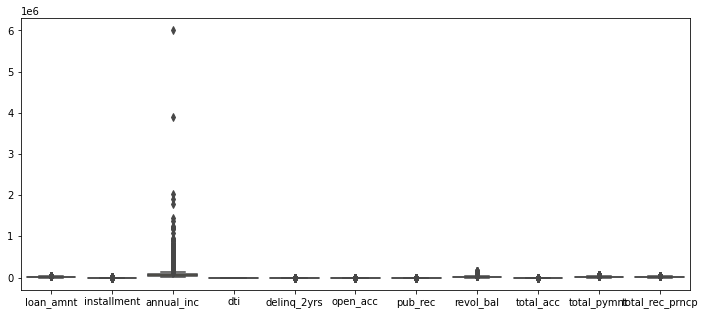

In [30]:
# Plot boxplot for all numerical varibales
plt.figure(figsize=(12,5))
sns.boxplot(inp0[['loan_amnt','installment','annual_inc','dti','delinq_2yrs','open_acc','pub_rec','revol_bal','total_acc','total_pymnt','total_rec_prncp']])

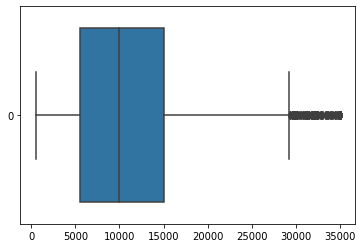

In [31]:
# plot boxplot for loan_amnt
sns.boxplot(inp0.loan_amnt,orient='h');

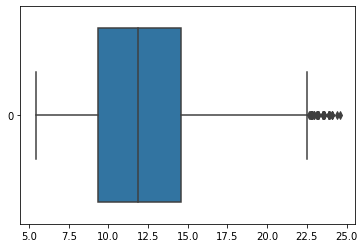

In [32]:
# plot boxplot for int_rate
sns.boxplot(inp0.int_rate,orient='h');

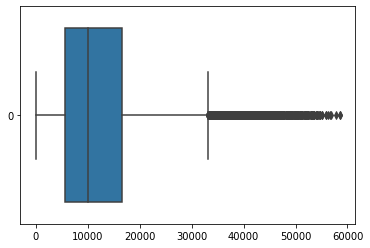

In [33]:
# plot boxplot for total_pymnt
sns.boxplot(inp0.total_pymnt,orient='h');

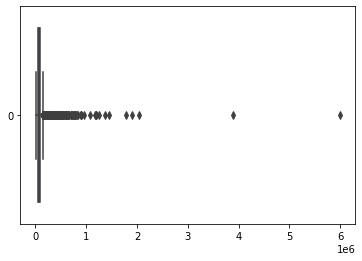

In [34]:
# Plot boxplot for annual_inc to finding out outliers
sns.boxplot(inp0.annual_inc,orient='h');

In [35]:
# Check different quantiles for annual_income
inp0.annual_inc.quantile([0.5,0.7,0.9,0.95,0.99,1])

0.50      60000.0
0.70      76800.0
0.90     117000.0
0.95     144000.0
0.99     235000.0
1.00    6000000.0
Name: annual_inc, dtype: float64

In [36]:
# describe the dataset whose annual income is greater than 235000.
inp0[inp0.annual_inc>235000].describe()

,loan_amnt,installment,int_rate,annual_inc,dti,delinq_2yrs,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_rec_prncp
count,384.000000,384.000000,384.000000,3.840000e+02,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000
mean,19819.791667,581.441589,13.473021,4.133172e+05,7.267656,0.247396,11.156250,0.026042,35248.981771,49.800260,29.919271,22572.498259,17880.573281
std,10054.022756,297.753810,4.184739,4.149584e+05,5.297093,0.624766,4.855248,0.175076,34775.207135,30.800763,12.527828,13406.153620,10153.010267
min,1000.000000,31.780000,5.420000,2.358000e+05,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,5.000000,657.890000,155.490000
25%,10556.250000,337.785000,10.370000,2.600000e+05,2.770000,0.000000,8.000000,0.000000,8306.000000,22.900000,20.750000,11684.342317,10000.000000
50%,20000.000000,563.965000,13.485000,3.000000e+05,6.455000,0.000000,11.000000,0.000000,25029.000000,50.950000,29.000000,21344.933000,17558.350000
75%,25100.000000,833.012500,16.412500,4.000000e+05,10.522500,0.000000,13.000000,0.000000,50439.750000,77.400000,38.000000,31265.649447,25000.000000
max,35000.000000,1295.210000,23.910000,6.000000e+06,26.880000,4.000000,29.000000,2.000000,148829.000000,99.900000,67.000000,57835.279910,35000.010000


#### Instead of using mean in this case we have to used median/quanitiles/percentage

## Standardising Values

In [37]:
# Lets check if there is need to standardizing value in dataset
inp0.head()

,loan_amnt,term,installment,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_rec_prncp,addr_state,application_type
0,5000,36 months,162.87,10.65,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,27.65,0,3,0,13648,83.7,9,5863.155187,5000.00,Arizona,INDIVIDUAL
1,2500,60 months,59.83,15.27,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,1.00,0,3,0,1687,9.4,4,1008.710000,456.46,Georgia,INDIVIDUAL
2,2400,36 months,84.33,15.96,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,8.72,0,2,0,2956,98.5,10,3005.666844,2400.00,Illinois,INDIVIDUAL
3,10000,36 months,339.31,13.49,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,20.00,0,10,0,5598,21.0,37,12231.890000,10000.00,California,INDIVIDUAL
4,3000,60 months,67.79,12.69,B,B5,1 year,RENT,80000.0,Source Verified,Current,other,17.94,0,15,0,27783,53.9,38,3513.330000,2475.94,Oregon,INDIVIDUAL


In [38]:
inp0.total_pymnt=inp0.total_pymnt.apply(lambda x: round(x,2))

- All columns have in same scale

### Filtering Data

In [39]:
# let see if we have any duplicated rows
inp0[inp0.duplicated()]

,loan_amnt,term,installment,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_rec_prncp,addr_state,application_type


- No duplicated rows

# Univariate Analysis 

## 1.Ordinal Categories

1. term1
2. grade
3. sub_grade
4. emp_length
5. loan_status

In [40]:
inp0.head(10)

,loan_amnt,term,installment,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_rec_prncp,addr_state,application_type
0,5000,36 months,162.87,10.65,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,27.65,0,3,0,13648,83.7,9,5863.16,5000.00,Arizona,INDIVIDUAL
1,2500,60 months,59.83,15.27,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,1.00,0,3,0,1687,9.4,4,1008.71,456.46,Georgia,INDIVIDUAL
2,2400,36 months,84.33,15.96,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,8.72,0,2,0,2956,98.5,10,3005.67,2400.00,Illinois,INDIVIDUAL
3,10000,36 months,339.31,13.49,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,20.00,0,10,0,5598,21.0,37,12231.89,10000.00,California,INDIVIDUAL
4,3000,60 months,67.79,12.69,B,B5,1 year,RENT,80000.0,Source Verified,Current,other,17.94,0,15,0,27783,53.9,38,3513.33,2475.94,Oregon,INDIVIDUAL
5,5000,36 months,156.46,7.90,A,A4,3 years,RENT,36000.0,Source Verified,Fully Paid,wedding,11.20,0,9,0,7963,28.3,12,5632.21,5000.00,Arizona,INDIVIDUAL
6,7000,60 months,170.08,15.96,C,C5,8 years,RENT,47004.0,Not Verified,Fully Paid,debt_consolidation,23.51,0,7,0,17726,85.6,11,10110.84,6985.61,North Carolina,INDIVIDUAL
7,3000,36 months,109.43,18.64,E,E1,9 years,RENT,48000.0,Source Verified,Fully Paid,car,5.35,0,4,0,8221,87.5,4,3939.14,3000.00,California,INDIVIDUAL
8,5600,60 months,152.39,21.28,F,F2,4 years,OWN,40000.0,Source Verified,Charged Off,small_business,5.55,0,11,0,5210,32.6,13,646.02,162.02,California,INDIVIDUAL
9,5375,60 months,121.45,12.69,B,B5,< 1 year,RENT,15000.0,Verified,Charged Off,other,18.08,0,2,0,9279,36.5,3,1476.19,673.48,Texas,INDIVIDUAL


### term

In [41]:
# calculate the percentage of each term category
inp0.term.value_counts(normalize=True)

 36 months    0.731779
 60 months    0.268221
Name: term, dtype: float64

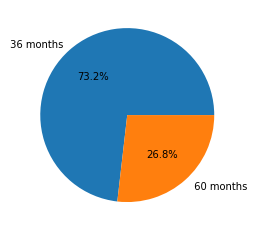

In [42]:
# plot the pie chart of percentage term actegories
inp0.term.value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.ylabel('');

### grade

In [43]:
# calculate the percentage of each grade category
inp0.grade.value_counts(normalize=True)

B    0.302759
A    0.251198
C    0.205052
D    0.134188
E    0.072134
F    0.026558
G    0.008110
Name: grade, dtype: float64

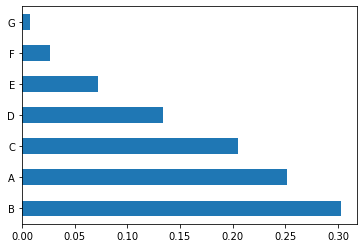

In [44]:
#plot the bar graph of percentage grade categories
inp0.grade.value_counts(normalize=True).plot.barh();

### sub_grade

In [45]:
# calculate the percentage of each sub_grade category
inp0.sub_grade.value_counts(normalize=True)

B3    0.073455
A4    0.072626
A5    0.068869
B5    0.068558
B4    0.063739
C1    0.054152
B2    0.051587
C2    0.051147
B1    0.045420
A3    0.045109
C3    0.038710
A2    0.037336
D2    0.034046
C4    0.031222
C5    0.029823
D3    0.029589
A1    0.027257
D4    0.024900
D1    0.023604
D5    0.022049
E1    0.019433
E2    0.016660
E3    0.013914
E4    0.011634
E5    0.010494
F1    0.008395
F2    0.006270
F3    0.004716
F4    0.004197
F5    0.002980
G1    0.002643
G2    0.001995
G4    0.001451
G3    0.001244
G5    0.000777
Name: sub_grade, dtype: float64

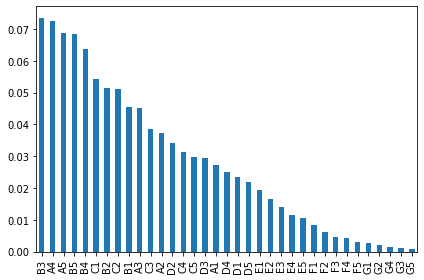

In [46]:
#plot the bar graph of percentage sub_grade categories
inp0.sub_grade.value_counts(normalize=True).plot.bar()
plt.tight_layout(w_pad=100)

### emp_length

In [47]:
# calculate the percentage of each emp_length category
inp0.emp_length.value_counts(normalize=True)

10+ years    0.230030
< 1 year     0.118435
2 years      0.113564
3 years      0.105998
4 years      0.088846
5 years      0.084933
1 year       0.083793
6 years      0.057676
7 years      0.045861
8 years      0.038269
9 years      0.032595
Name: emp_length, dtype: float64

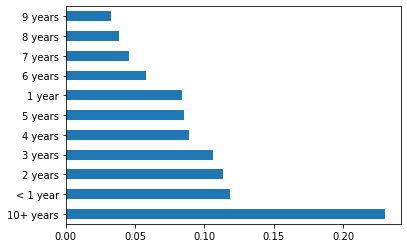

In [48]:
#plot the bar graph of percentage emp_length categories
inp0.emp_length.value_counts(normalize=True).plot.barh();

### loan_status

In [49]:
# calculate the percentage of each loan_status category
inp0.loan_status.value_counts(normalize=True)

Fully Paid     0.832051
Charged Off    0.139500
Current        0.028449
Name: loan_status, dtype: float64

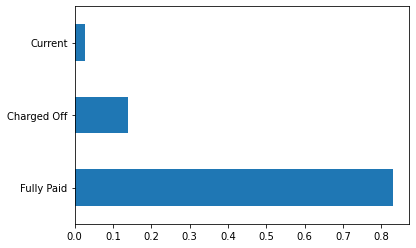

In [50]:
#plot the bar graph of percentage loan_status categories
inp0.loan_status.value_counts(normalize=True).plot.barh();

## 2.Nominal Categories
1. home_ownership
2. verification_status
3. purpose
4. application_type
5. initial_line_status

### home_ownership

In [51]:
# calculate the percentage of each home_ownership category
inp0.home_ownership.value_counts(normalize=True)

RENT        0.478223
MORTGAGE    0.445731
OWN         0.073481
OTHER       0.002487
NONE        0.000078
Name: home_ownership, dtype: float64

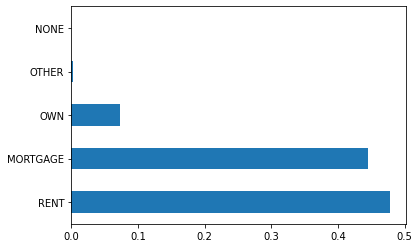

In [52]:
#plot the bar graph of percentage home_ownership categories
inp0.home_ownership.value_counts(normalize=True).plot.barh();

### Verification_status

In [53]:
# calculate the percentage of each varification_status category
inp0.verification_status.value_counts(normalize=True)

Not Verified       0.426739
Verified           0.319860
Source Verified    0.253401
Name: verification_status, dtype: float64

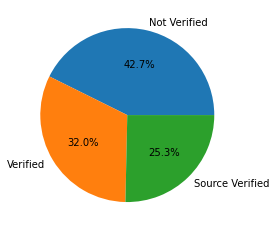

In [54]:
#plot the pie chart of percentage verification_status categories
inp0.verification_status.value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.ylabel('');

### purpose

In [55]:
# calculate the percentage of each purpose category
inp0.purpose.value_counts(normalize=True)

debt_consolidation    0.472367
credit_card           0.129499
other                 0.098977
home_improvement      0.074517
major_purchase        0.054644
small_business        0.046172
car                   0.038736
wedding               0.024174
medical               0.017256
moving                0.014432
house                 0.009535
vacation              0.009094
educational           0.008136
renewable_energy      0.002461
Name: purpose, dtype: float64

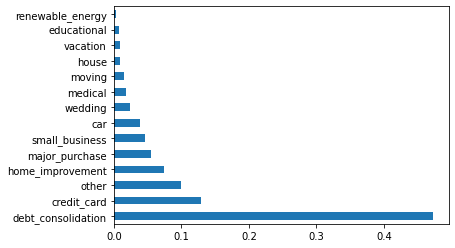

In [56]:
#plot the bar graph of percentage purpose categories
inp0.purpose.value_counts(normalize=True).plot.barh();

### application_type

In [57]:
# calculate the percentage of each application_type category
inp0.application_type.value_counts()

INDIVIDUAL    38595
Name: application_type, dtype: int64

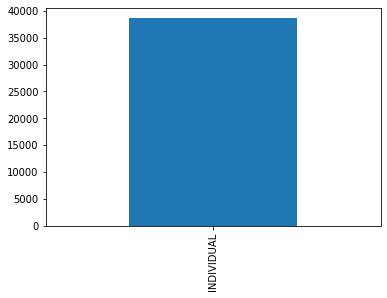

In [58]:
#plot the bar graph of percentage application_type categories
inp0.application_type.value_counts().plot.bar();

## 3.Numerical Analysis

In [59]:
# describe the dataset
inp0.describe()

,loan_amnt,installment,int_rate,annual_inc,dti,delinq_2yrs,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_rec_prncp
count,38595.000000,38595.000000,38595.000000,3.859500e+04,38595.000000,38595.000000,38595.000000,38595.000000,38595.000000,38595.000000,38595.000000,38595.000000,38595.000000
mean,11299.630133,326.965074,12.048118,6.963713e+04,13.328991,0.146858,9.323332,0.053375,13472.994067,48.998908,22.135924,12252.967235,9872.445500
std,7461.962656,209.147762,3.715935,6.424780e+04,6.665582,0.492300,4.393713,0.234044,15916.590132,28.306354,11.389902,9056.791227,7075.931307
min,500.000000,15.690000,5.420000,4.000000e+03,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,5500.000000,168.450000,9.320000,4.150000e+04,8.210000,0.000000,6.000000,0.000000,3761.000000,25.600000,14.000000,5629.600000,4750.000000
50%,10000.000000,283.180000,11.860000,6.000000e+04,13.420000,0.000000,9.000000,0.000000,8953.000000,49.500000,20.000000,10033.120000,8000.000000
75%,15000.000000,434.750000,14.590000,8.320000e+04,18.600000,0.000000,12.000000,0.000000,17161.500000,72.500000,29.000000,16651.640000,13917.680000
max,35000.000000,1305.190000,24.590000,6.000000e+06,29.990000,11.000000,44.000000,4.000000,149588.000000,99.900000,90.000000,58563.680000,35000.020000


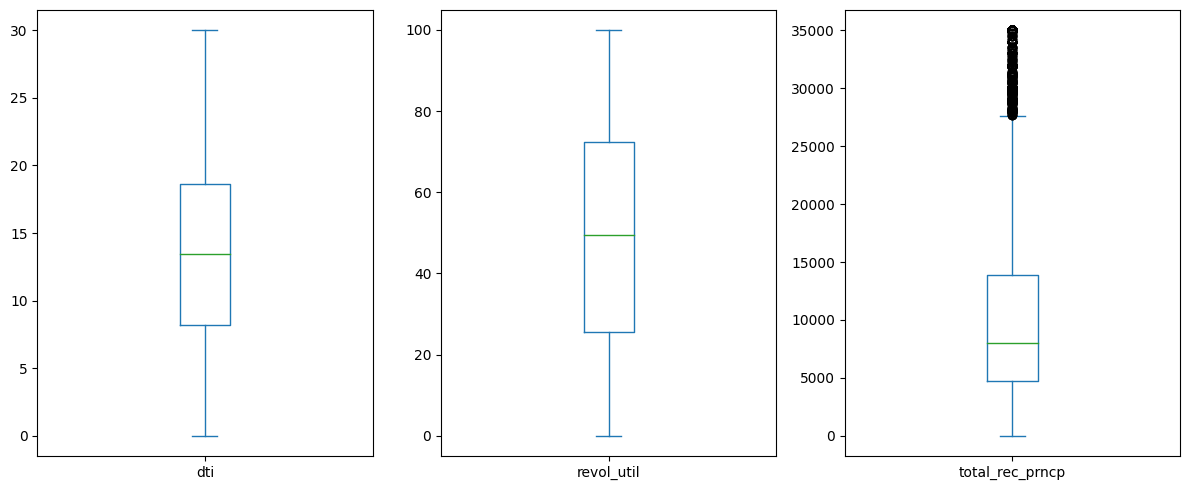

In [60]:
# plot the boxplot for dti,revol_util,total_rec_prncp
plt.figure(figsize=(12,5),dpi=100)
plt.subplot(1,3,1)
inp0.dti.plot.box();
plt.subplot(1,3,2)
inp0.revol_util.plot.box();
plt.subplot(1,3,3)
inp0.total_rec_prncp.plot.box();
plt.tight_layout(h_pad=100)

# Bivariate Analysis
## 1.Category vs Category Analysis

In [61]:
# let see vvalue_counts for eac_loan_status
inp0.loan_status.value_counts()

Fully Paid     32113
Charged Off     5384
Current         1098
Name: loan_status, dtype: int64

In [62]:
# create defaulted of numerical data type where response "charged off"= 1, "Fully Paid"=0, "Current"= 0
inp0['defaulted']=inp0.loan_status.map({'Fully Paid': 0, 'Current': 0, 'Charged Off': 1})

In [63]:
inp0.defaulted.value_counts()

0    33211
1     5384
Name: defaulted, dtype: int64

In [64]:
inp0.head()

,loan_amnt,term,installment,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_rec_prncp,addr_state,application_type,defaulted
0,5000,36 months,162.87,10.65,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,27.65,0,3,0,13648,83.7,9,5863.16,5000.00,Arizona,INDIVIDUAL,0
1,2500,60 months,59.83,15.27,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,1.00,0,3,0,1687,9.4,4,1008.71,456.46,Georgia,INDIVIDUAL,1
2,2400,36 months,84.33,15.96,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,8.72,0,2,0,2956,98.5,10,3005.67,2400.00,Illinois,INDIVIDUAL,0
3,10000,36 months,339.31,13.49,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,20.00,0,10,0,5598,21.0,37,12231.89,10000.00,California,INDIVIDUAL,0
4,3000,60 months,67.79,12.69,B,B5,1 year,RENT,80000.0,Source Verified,Current,other,17.94,0,15,0,27783,53.9,38,3513.33,2475.94,Oregon,INDIVIDUAL,0


### term vs defaulted

In [65]:
#calculate the mean of defaulted with different term categories
inp0.groupby('term')['defaulted'].mean()

term
 36 months    0.108381
 60 months    0.224401
Name: defaulted, dtype: float64

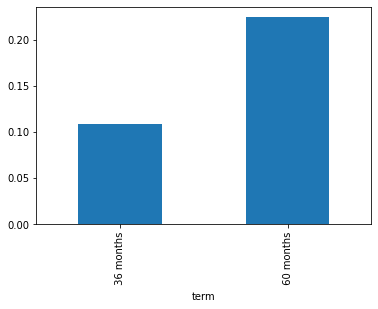

In [66]:
#plot the bar graph of term with mean value of defaulted
inp0.groupby('term')['defaulted'].mean().plot.bar();

- The bar graph clearly illustrates that loans with a term of 60 months are significantly more prone to default compared to those with a 36-month term. This indicates that borrowers who opt for longer-term loans have a higher likelihood of encountering payment difficulties and defaulting on their loans.

### grade vs defaulted

In [67]:
#calculate the mean of defaulted with different grade categories
inp0.groupby('grade')['defaulted'].mean()

grade
A    0.057555
B    0.115961
C    0.162370
D    0.208921
E    0.250000
F    0.302439
G    0.313099
Name: defaulted, dtype: float64

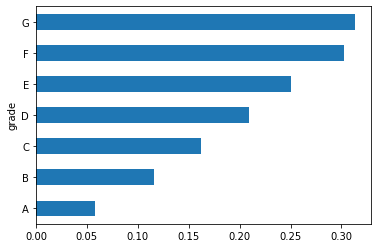

In [68]:
#plot the bar graph of grade with mean value of defaulted
inp0.groupby('grade')['defaulted'].mean().plot.barh();

- The insights obtained from the bar graph are quite revealing. It's evident that loans graded as 'A' exhibit the lowest default rates compared to 'G', 'F', and 'E' grades. Interestingly, among the grades with the highest default rates, 'G' stands out as the most problematic, closely followed by 'F'. This data underscores the importance of grade classification in predicting loan performance, with higher grades generally associated with more reliable repayment behavior.

### sub_grdae vs defaulted

In [69]:
#calculate the mean of defaulted with different sub_grade categories
inp0.groupby('sub_grade')['defaulted'].mean()

sub_grade
A1    0.022814
A2    0.047189
A3    0.051694
A4    0.059936
A5    0.078254
B1    0.087849
B2    0.105977
B3    0.114991
B4    0.129268
B5    0.130763
C1    0.153110
C2    0.154509
C3    0.173360
C4    0.168465
C5    0.172024
D1    0.177827
D2    0.197869
D3    0.217163
D4    0.216441
D5    0.239718
E1    0.257333
E2    0.247278
E3    0.214153
E4    0.276169
E5    0.259259
F1    0.274691
F2    0.272727
F3    0.274725
F4    0.320988
F5    0.460870
G1    0.284314
G2    0.350649
G3    0.395833
G4    0.232143
G5    0.333333
Name: defaulted, dtype: float64

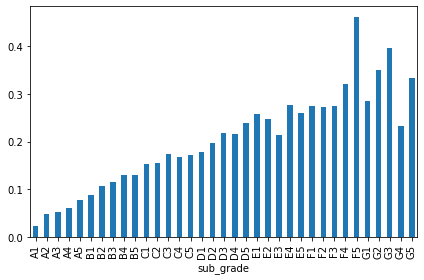

In [70]:
#plot the bar graph of sub_grade with mean value of defaulted
inp0.groupby('sub_grade')['defaulted'].mean().plot.bar()
plt.tight_layout();

- The bar plots provide a clear depiction of default rates across different sub-grades. Specifically, it's evident that 'F4' sub-grade exhibits the highest default rate, making it a concerning category for loan repayment. On the flip side, 'A1' sub-grade stands out as the least risky, with the lowest default rate observed among all sub-grades. This nuanced analysis of sub-grades helps in identifying specific risk segments within the broader loan grade categories.

### emp_length vs defaulted

In [71]:
#calculate the mean of defaulted with different emp_length categories
inp0.groupby('emp_length')['defaulted'].mean()

emp_length
1 year       0.140074
10+ years    0.149809
2 years      0.129135
3 years      0.135664
4 years      0.134150
5 years      0.139414
6 years      0.137017
7 years      0.148588
8 years      0.136764
9 years      0.125596
< 1 year     0.138919
Name: defaulted, dtype: float64

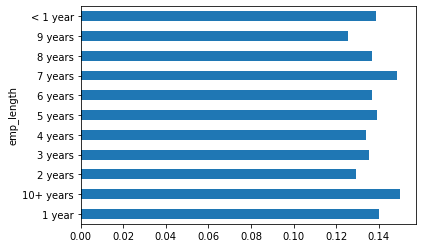

In [72]:
#plot the bar graph of emp_lebgth with mean value of defaulted
inp0.groupby('emp_length')['defaulted'].mean().plot.barh();

- The bar plot comparing employment length to loan defaults doesn't reveal substantial differences among different employment lengths. The distribution of defaulted loans appears fairly consistent across various employment duration categories, showing minimal variation. 

### home_ownership vs defaulted

In [73]:
#calculate the mean of defaulted with different home_ownership categories
inp0.groupby('home_ownership')['defaulted'].mean()

home_ownership
MORTGAGE    0.130326
NONE        0.000000
OTHER       0.187500
OWN         0.140339
RENT        0.147695
Name: defaulted, dtype: float64

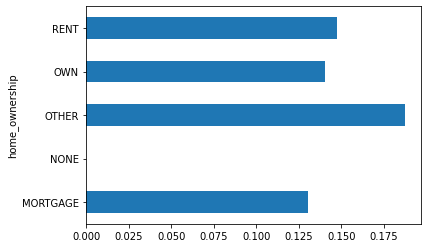

In [74]:
#plot the bar graph of home_ownersip with mean value of defaulted
inp0.groupby('home_ownership')['defaulted'].mean().plot.barh();

- The above graph indicates that borrowers with a "Other" home ownership status have the highest rate of defaults. On the opposite end of the spectrum, those with a "NONE" home ownership status have a default rate of 0%. In close proximity, we find "Rent" as the second-highest in default rates, while "Mortgage" stands as the category with the lowest default rate.

### verification_status vs defaulted

In [75]:
#calculate the mean of defaulted with different verification_status categories
inp0.groupby('verification_status')['defaulted'].mean()

verification_status
Not Verified       0.123983
Source Verified    0.142434
Verified           0.157878
Name: defaulted, dtype: float64

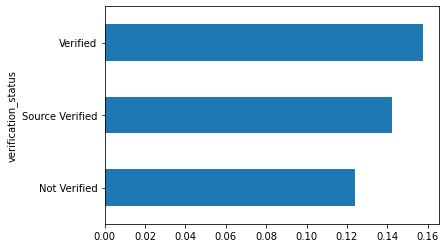

In [76]:
#plot the bar graph of verification_status with mean value of defaulted
inp0.groupby('verification_status')['defaulted'].mean().plot.barh();

- The bar graph above demonstrates that borrowers with a "Verified" verification status exhibit the highest default rate, while on the contrary, those labeled as "Not Verified" display the lowest default rate, which is somewhat unexpected.

### pupose vs defaulted

In [77]:
#calculate the mean of defaulted with different purpose categories
inp0.groupby('purpose')['defaulted'].mean()

purpose
car                   0.103010
credit_card           0.101841
debt_consolidation    0.146673
educational           0.165605
home_improvement      0.114047
house                 0.160326
major_purchase        0.099573
medical               0.150150
moving                0.150808
other                 0.154974
renewable_energy      0.189474
small_business        0.259259
vacation              0.142450
wedding               0.098607
Name: defaulted, dtype: float64

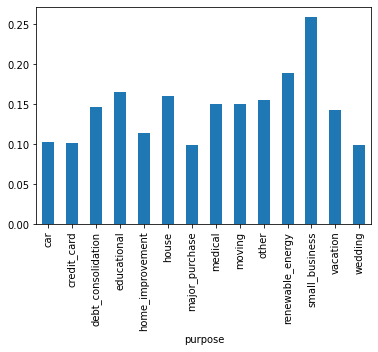

In [78]:
#plot the bar graph of purpose with mean value of defaulted
inp0.groupby('purpose')['defaulted'].mean().plot.bar();

- Analyzing the bar graph above, it's evident that loans with the purpose of "small_business" have the highest default rate. While we can't definitively conclude the reason behind this trend, it's worth noting that loans associated with education and renewable energy purposes follow with the second highest default rates.

## 2.Numerical vs Numerical Analysis

### loan_amnt vs annual_inc

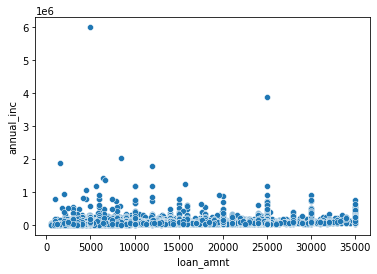

In [79]:
#plot the scatter plot of loan_amnt and annual_inc variable in inp0
sns.scatterplot(x=inp0.loan_amnt,y=inp0.annual_inc);

- Analyzing the scatter plot above for loan amount (loan_amnt) against annual income (annual_inc), it's apparent that there isn't a strong visible trend between the two variables. However, it's notable that the majority of loan amounts are clustered in the range of 0 to 1,000,000, regardless of the annual income.

In [80]:
# Calculate the correlation between each variable with one another
inp0[['loan_amnt','installment','int_rate','annual_inc','dti','delinq_2yrs','open_acc','pub_rec','revol_bal','revol_util',
      'total_acc','total_pymnt','total_rec_prncp','defaulted']].corr()

,loan_amnt,installment,int_rate,annual_inc,dti,delinq_2yrs,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_rec_prncp,defaulted
loan_amnt,1.000000,0.929670,0.309010,0.268364,0.064923,-0.033504,0.172921,-0.047936,0.316547,0.065149,0.254899,0.886056,0.851366,0.052000
installment,0.929670,1.000000,0.281641,0.267553,0.052500,-0.021429,0.168826,-0.043268,0.311996,0.094362,0.229266,0.856147,0.850260,0.025769
int_rate,0.309010,0.281641,1.000000,0.050840,0.113305,0.157838,0.013667,0.097613,0.099286,0.465939,-0.040993,0.308289,0.186266,0.197928
annual_inc,0.268364,0.267553,0.050840,1.000000,-0.124861,0.022091,0.155628,-0.015238,0.279187,0.015795,0.234488,0.254786,0.256320,-0.038994
dti,0.064923,0.052500,0.113305,-0.124861,1.000000,-0.035651,0.289188,-0.005077,0.228182,0.278458,0.230389,0.064131,0.040626,0.039688
delinq_2yrs,-0.033504,-0.021429,0.157838,0.022091,-0.035651,1.000000,0.010582,0.010226,-0.055592,-0.043104,0.066835,-0.024125,-0.040156,0.018733
open_acc,0.172921,0.168826,0.013667,0.155628,0.289188,0.010582,1.000000,0.002770,0.287255,-0.087729,0.685373,0.158536,0.156064,-0.007112
pub_rec,-0.047936,-0.043268,0.097613,-0.015238,-0.005077,0.010226,0.002770,1.000000,-0.059540,0.058076,-0.020091,-0.050791,-0.062465,0.050048
revol_bal,0.316547,0.311996,0.099286,0.279187,0.228182,-0.055592,0.287255,-0.059540,1.000000,0.303747,0.313557,0.292751,0.280921,0.004748
revol_util,0.065149,0.094362,0.465939,0.015795,0.278458,-0.043104,-0.087729,0.058076,0.303747,1.000000,-0.068037,0.079380,0.024795,0.096039


- Upon analyzing the correlation table, we observe that there is a negative correlation between several variables. Specifically, variables such as annual income (annual_inc), number of open credit lines (open_acc), total number of credit lines (total_acc), total payment received (total_pymnt), and total received principal (total_rec_prncp) exhibit negative correlations. This implies that as one of these variables increases, the other tends to decrease, suggesting a possible inverse relationship between them

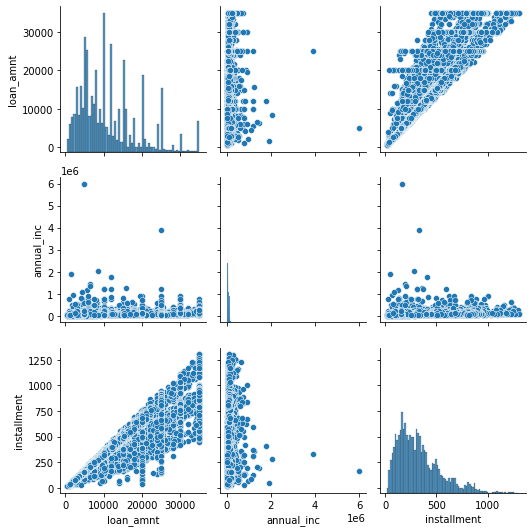

In [81]:
#plot the pair plot of loan_amnt, annual_inc and installment in inp0 dataframe
sns.pairplot(data=inp0,vars=['loan_amnt','annual_inc','installment']);
plt.tight_layout()

- The pairplot indicates a linear relationship between 'installment' and 'loan_amnt'.

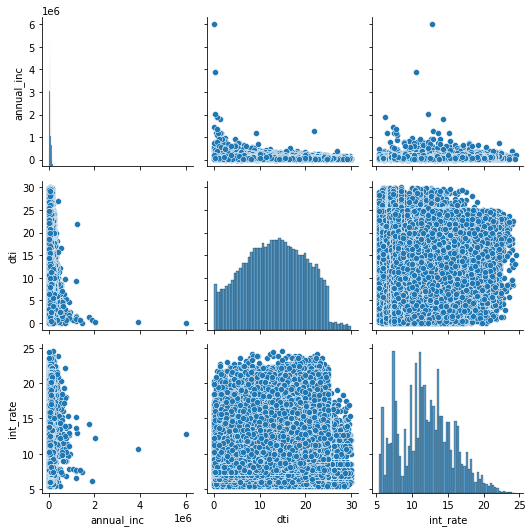

In [82]:
#plot the pair plot of annual_inc, dti and installment in inp0 dataframe
sns.pairplot(data=inp0,vars=['annual_inc','dti','int_rate']);
plt.tight_layout()

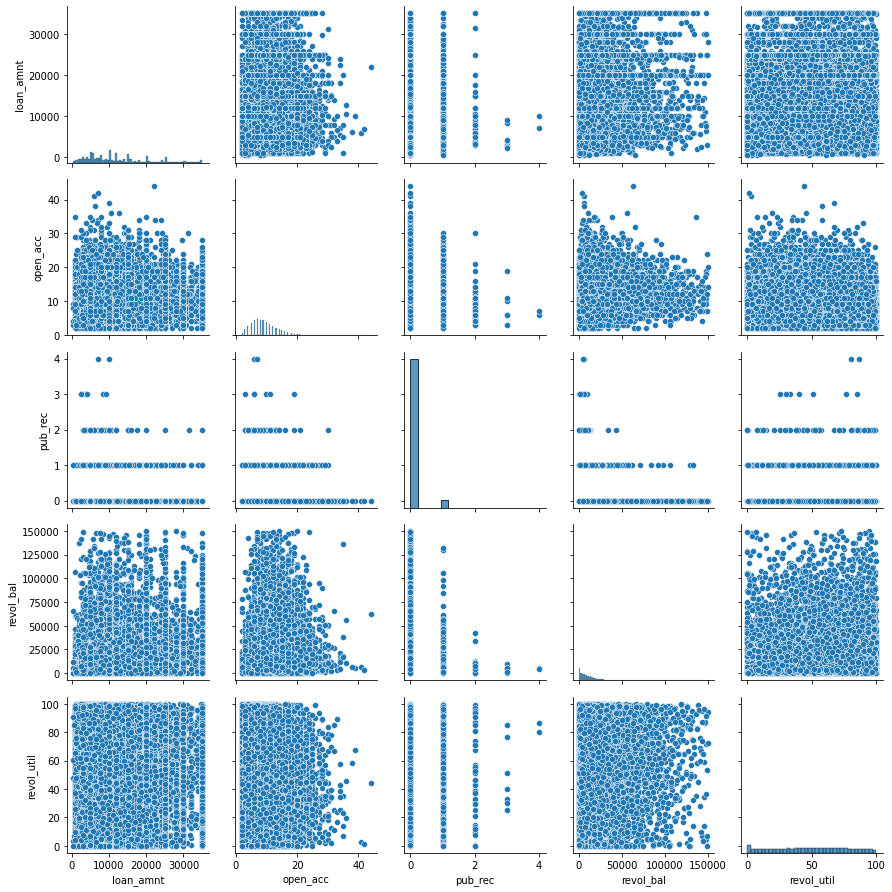

In [83]:
#plot the pair plot of loan_amnt, open_acc, pub_rec, revol_bal, and revol_util in inp0 dataframe
sns.pairplot(data=inp0,vars=['loan_amnt','open_acc','pub_rec','revol_bal','revol_util']);
plt.tight_layout()

- Both of the above pairplots do not exhibit strong relationships between the numerical variables.

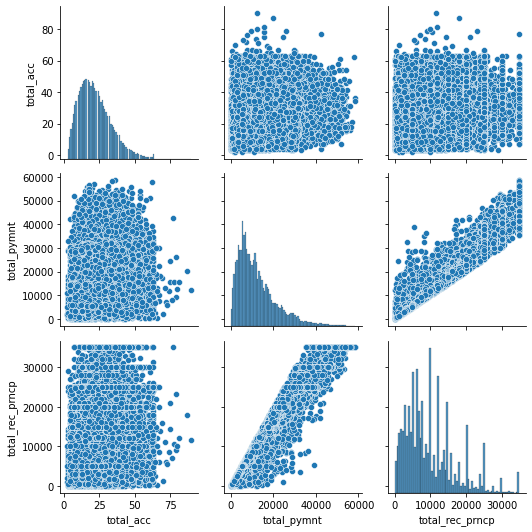

In [84]:
#plot the pair plot of total_acc, open_acc, total_pymnt and total_rec_prncp in inp0 dataframe
sns.pairplot(data=inp0,vars=['total_acc','total_pymnt','total_rec_prncp']);
plt.tight_layout()

-There is a linear relationship between "total_pymnt" and "total_rec_prncp".

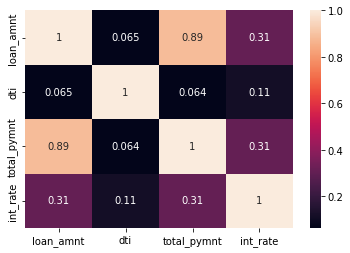

In [85]:
#plot the correlation matrix of loan_amnt, dti, total_pymnt and int_rate in inp0 dataframe
sns.heatmap(inp0[['loan_amnt','dti','total_pymnt','int_rate']].corr(),annot=True);

- The heatmap indicates a strong positive correlation between "loan_amnt" and "total_pymnt".

### 3.Category vs Numerical Analysis

In [86]:
inp0.head()

,loan_amnt,term,installment,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_rec_prncp,addr_state,application_type,defaulted
0,5000,36 months,162.87,10.65,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,27.65,0,3,0,13648,83.7,9,5863.16,5000.00,Arizona,INDIVIDUAL,0
1,2500,60 months,59.83,15.27,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,1.00,0,3,0,1687,9.4,4,1008.71,456.46,Georgia,INDIVIDUAL,1
2,2400,36 months,84.33,15.96,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,8.72,0,2,0,2956,98.5,10,3005.67,2400.00,Illinois,INDIVIDUAL,0
3,10000,36 months,339.31,13.49,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,20.00,0,10,0,5598,21.0,37,12231.89,10000.00,California,INDIVIDUAL,0
4,3000,60 months,67.79,12.69,B,B5,1 year,RENT,80000.0,Source Verified,Current,other,17.94,0,15,0,27783,53.9,38,3513.33,2475.94,Oregon,INDIVIDUAL,0


In [87]:
#create the buckets of 10 t0 80-90 from total_acc column
inp0['group_tot_acc']=pd.cut(inp0.total_acc,bins=[0,10,20,30,40,50,60,70,80,90],labels=['<10','10-20','20-30','30-40','40-50',
                            '50-60','60-70','70-80','80-90'])

In [88]:
#create the buckets of 10 t0 40-50 from total_acc column
inp0['group_open_acc']=pd.cut(inp0.open_acc,bins=[0,10,20,30,40,50],labels=['<10','10-20','20-30','30-40','40-50'])

### group_tot_acc vs defaulted

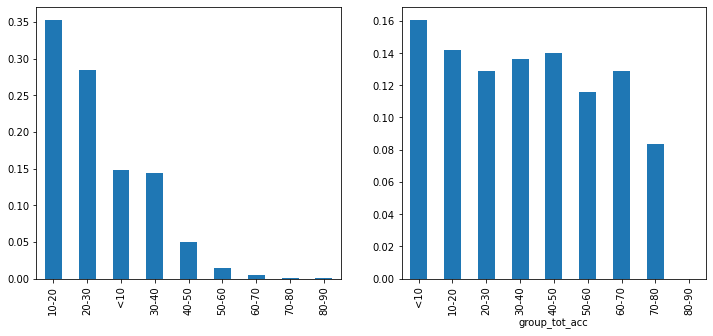

In [89]:
#plot the percentage of each buckets and average values of defaulted in each buckets. plot in subplots
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
inp0.group_tot_acc.value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2)
inp0.groupby('group_tot_acc')['defaulted'].mean().plot.bar();

- The bar graph showcases that the "total_acc" groups ranging from 10 to 20 have the highest percentage in the dataset, followed by the groups from 20 to 30. Conversely, the groups 70-80 and 80-90 have the least representation. Notably, the groups with the highest default rates are <10, closely followed by 10-20. Surprisingly, groups 60-70 and 70-80, which represent a smaller percentage in the dataset, exhibit a notable number of defaults.

### group_open_acc vs defaulted

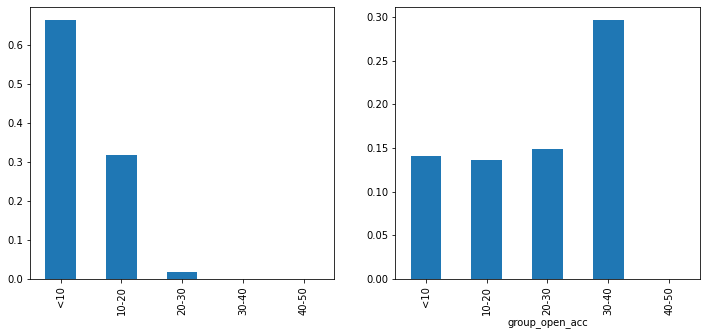

In [90]:
#plot the percentage of each buckets and average values of defaulted in each buckets. plot in subplots
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
inp0.group_open_acc.value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2)
inp0.groupby('group_open_acc')['defaulted'].mean().plot.bar();

- The bar graph reveals that the "open_acc" group <10 holds the highest percentage in the dataset, while the group 30-40 has the lowest representation. However, when we consider the defaulted loans, it becomes evident that the "open_acc" group 30-40 has the highest rate of defaults.

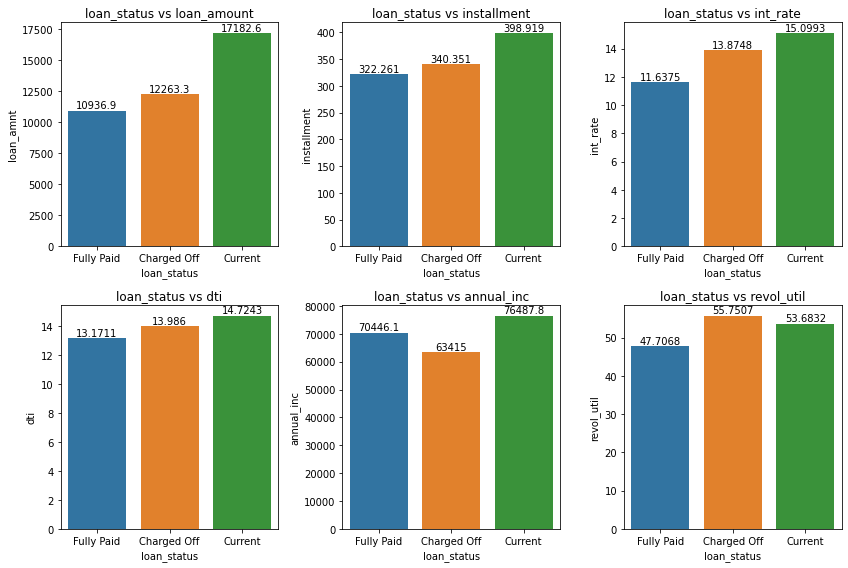

In [91]:
# plot bar graph for nnumeical columns vs loan_status
fig,axe=plt.subplots(nrows=2,ncols=3,figsize=(12,8))
a=sns.barplot(x=inp0.loan_status,y=inp0.loan_amnt,errorbar=None,ax=axe[0][0])
a.set_title('loan_status vs loan_amount')
for i in a.containers:
    a.bar_label(i,)
plt.tight_layout()
b=sns.barplot(x=inp0.loan_status,y=inp0.installment,errorbar=None,ax=axe[0][1])
b.set_title('loan_status vs installment')
for i in b.containers:
    b.bar_label(i,)
plt.tight_layout()
c=sns.barplot(x=inp0.loan_status,y=inp0.int_rate,errorbar=None,ax=axe[0][2])
c.set_title('loan_status vs int_rate')
for i in c.containers:
    c.bar_label(i,)
plt.tight_layout()
d=sns.barplot(x=inp0.loan_status,y=inp0.dti,errorbar=None,ax=axe[1][0])
d.set_title('loan_status vs dti')
for i in d.containers:
    d.bar_label(i,)
plt.tight_layout()
e=sns.barplot(x=inp0.loan_status,y=inp0.annual_inc,errorbar=None,ax=axe[1][1])
e.set_title('loan_status vs annual_inc')
for i in e.containers:
    e.bar_label(i,)
plt.tight_layout()
f=sns.barplot(x=inp0.loan_status,y=inp0.revol_util,errorbar=None,ax=axe[1][2])
f.set_title('loan_status vs revol_util')
for i in f.containers:
    f.bar_label(i,)
plt.tight_layout(w_pad=100)

- The "loan_status" vs. "loan_amnt" bar graph shows that the most common loan status is "current," followed by "charged off," and "fully paid."
- In the "loan_status" vs. "revol_util" bar graph, the statuses "charged off" or "defaulted" have a higher count compared to the other statuses, indicating that higher revolving utilization might be associated with increased chances of defaulting.

### loan_status vs revol_balance

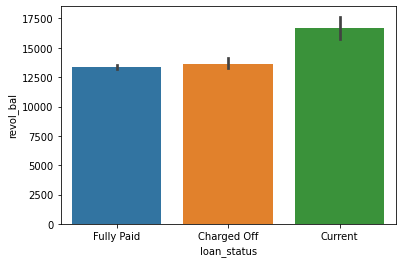

In [92]:
# plot bar graph for revol_balance columns vs loan_status
sns.barplot(x=inp0.loan_status,y=inp0.revol_bal);

### loan_status vs total_payment

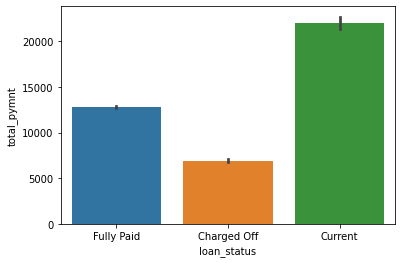

In [93]:
# plot bar graph for loan_status columns vs loan_status
sns.barplot(x=inp0.loan_status,y=inp0.total_pymnt);

### delinq_2yrs vs defalted

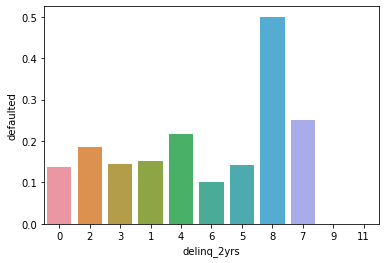

In [94]:
# plot bar graph for delinq_2yrs as object vs defaulted
sns.barplot(x=inp0.delinq_2yrs.astype('str'),y=inp0.defaulted,errorbar=None);

- In the bar graph presented above, it is evident that loans associated with a delinquency history of 8 occurrences have the highest default rate. Following closely, loans with 7 instances of delinquency also exhibit a notable default frequency. This indicates a potential correlation between the number of delinquencies and the likelihood of loan default.

### pub_rec vs defaluted

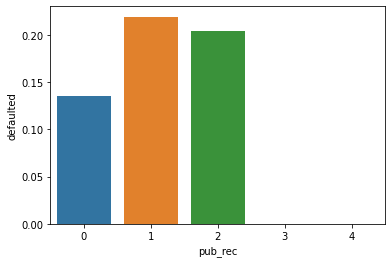

In [95]:
# plot bar graph for pub_rec as object vs defaulted
sns.barplot(x=inp0.pub_rec.astype('str'),y=inp0.defaulted,errorbar=None);

- The bar graph reveals that loans associated with borrowers having a public record (pub_rec) of 1 show the highest rate of default. Following closely are loans from borrowers with a pub_rec of 2, while those with a pub_rec of 0 exhibit a lower default rate. Interestingly, there are no records available for borrowers with pub_rec values of 3 or 4, suggesting a potential relationship between public records and loan default behavior.

# Multivariate Analysis

In [96]:
inp0.head()

,loan_amnt,term,installment,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_rec_prncp,addr_state,application_type,defaulted,group_tot_acc,group_open_acc
0,5000,36 months,162.87,10.65,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,27.65,0,3,0,13648,83.7,9,5863.16,5000.00,Arizona,INDIVIDUAL,0,<10,<10
1,2500,60 months,59.83,15.27,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,1.00,0,3,0,1687,9.4,4,1008.71,456.46,Georgia,INDIVIDUAL,1,<10,<10
2,2400,36 months,84.33,15.96,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,8.72,0,2,0,2956,98.5,10,3005.67,2400.00,Illinois,INDIVIDUAL,0,<10,<10
3,10000,36 months,339.31,13.49,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,20.00,0,10,0,5598,21.0,37,12231.89,10000.00,California,INDIVIDUAL,0,30-40,<10
4,3000,60 months,67.79,12.69,B,B5,1 year,RENT,80000.0,Source Verified,Current,other,17.94,0,15,0,27783,53.9,38,3513.33,2475.94,Oregon,INDIVIDUAL,0,30-40,10-20


### loan_amnt vs annual_ins vs loan_status

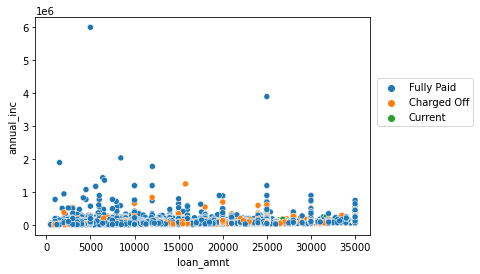

In [97]:
#create scatter plot of loan_amnt vs annual_inc vs loan_status
sns.scatterplot(inp0,x=inp0.loan_amnt,y=inp0.annual_inc,hue=inp0.loan_status)
plt.legend(loc=(1.02,0.5));

- From the scatter plot, it's evident that borrowers with an annual income below 1,000,000 exhibit a higher likelihood of defaulting on their loans. This trend is noticeable throughout the range of annual income values up to 1,000,000, emphasizing that lower income levels correlate with a higher probability of loan default.

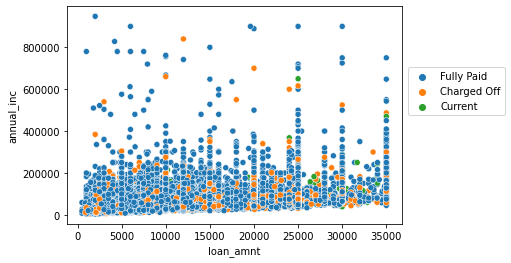

In [98]:
#create scatter plot of loan_amnt vs annual_inc vs loan_status where annual_inc <1000000
sns.scatterplot(data=inp0[inp0.annual_inc<1000000],x='loan_amnt',y='annual_inc',hue=inp0.loan_status)
plt.legend(loc=(1.02,0.5));

- By plotting the scatter graph for annual income less than 1000000, we observe a significant concentration of defaulted or charged off cases among individuals with an annual income of less than 200000.

### term vs grade vs defaulted

In [99]:
#create pivot_table of term vs grade vs defaulted
res1=pd.pivot_table(inp0,columns='term',index='grade',values='defaulted')

In [100]:
# check the mean of defaulted column
inp0.defaulted.mean()

0.13949993522477006

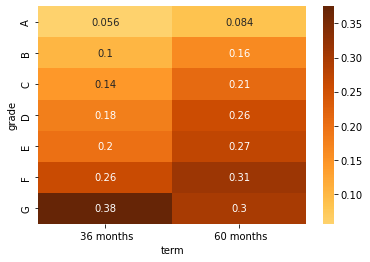

In [101]:
#plot heat map of term vs grade vs defaulted
sns.heatmap(res1,annot=True,cmap='YlOrBr',center=0.141);

- The heatmap highlights that loans categorized as grade G with a 36-month term have the highest rate of defaulting. Moreover, the heatmap suggests a trend where higher-grade loans exhibit lower default risks. Specifically, loans assigned lower grades, like grade A, have a relatively lower likelihood of defaulting.

### emp_lenght vs home_ownership vs defaulted

In [102]:
#create pivot_table of emp_length vs home_ownership vs defaulted
res2=pd.pivot_table(data=inp0[inp0.home_ownership!='NONE'],index='emp_length',columns='home_ownership',values='defaulted')

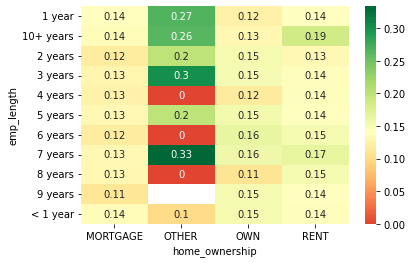

In [103]:
#plot heat map of emp_length vs home_ownership vs defaulted
sns.heatmap(res2,annot=True,cmap='RdYlGn',center=0.141);

- From the heatmap, it's apparent that the highest risk of defaulting is associated with borrowers having a 7-year employment length and an "Other" category for home ownership. Additionally, a 1-year employment length combined with the "Other" home ownership category also shows a notable incidence of defaulting.

### verification vs purpose vs defaulted

In [104]:
#create pivot_table of verification_status vs purpose vs defaulted
res3=pd.pivot_table(inp0,columns='verification_status',index='purpose',values='defaulted')

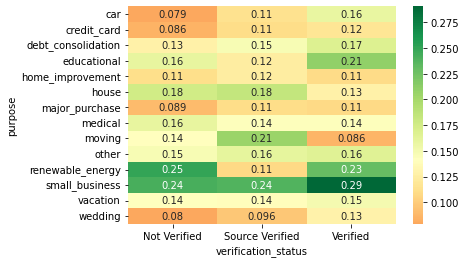

In [105]:
#create heat map of verification_status vs purpose vs defaulted
sns.heatmap(res3,annot=True,cmap='RdYlGn',center=0.141);

- From the heatmap, it's evident that the combination of "Small Business" purpose and "Verified" verification status has the highest rate of defaults. Additionally, when examining the "Small Business" purpose across different verification statuses, such as "Source Verified" and "Not Verified," a higher likelihood of defaulting is observed. Furthermore, the purpose of "Moving" with a "Source Verified" verification status also demonstrates a notable default rate. Similarly, instances where the purpose is "Educational" and the verification status is "Verified" are associated with a higher probability of defaulting.

# CONCLUSION

In this comprehensive case study analyzing loan data, we have gained valuable insights into the factors that play a crucial role in loan default rates. Through various data visualizations and statistical analyses, the following factors have emerged as significant determinants of loan default:

## 1. Loan Term and Grade: 
Loans with longer terms, particularly 60 months, tend to have a higher probability of default. Moreover, loans with lower grades (such as Grade G) show elevated default rates compared to higher-grade loans (e.g., Grade A), suggesting that borrower creditworthiness strongly influences default risk.

## 2. Home Ownership: 
Borrowers categorized as "Other" in terms of home ownership exhibit the highest default rates. Conversely, those with "None" as their home ownership status tend to have the lowest default rates, indicating the importance of stability in homeownership.

## 3. Loan Purpose: 
Loans taken out for "Small Business" purposes, especially when verified, are associated with the highest default rates. "Educational" and "Moving" loan purposes also show a higher likelihood of default, especially when combined with certain verification statuses.

## 4. Verification Status:
Borrowers with "Verified" status generally have a higher propensity to default on their loans. This is especially pronounced when coupled with particular loan purposes, emphasizing the role of verification in assessing risk.

## 5. Annual Income:¶
The borrower's annual income is another crucial factor that impacts loan default rates. The scatter plots and analysis reveal that borrowers with lower annual incomes, particularly below $2,00,000, exhibit a higher risk of defaulting. This suggests that borrowers with lower income levels may struggle with repayment, leading to a higher likelihood of default.

## 6. Revolving Credit Utilization: 
A higher utilization of revolving credit lines is linked to increased default risk. Borrowers with elevated credit utilization may struggle with debt management, leading to a higher likelihood of default.

## 7. Number of Delinquencies:
Borrowers with a history of multiple delinquencies in the past two years are more likely to default. As the number of delinquencies increases, so does the risk of default.